In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Set plot style
plt.style.use('ggplot')

In [2]:
# Load the dataset
df = pd.read_csv('../data/processed/final_model_ready_data.csv')

# Features for 65%+ target
features = ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'HTFormPts', 'ATFormPts', 'B365H', 'B365D', 'B365A']
X = df[features]
y = df['FTR_Binary']

# STRICT 80/20 CHRONOLOGICAL SPLIT
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Scaling (Important for Logistic Regression convergence)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(f"Training on: {len(X_train)} matches")
print(f"Testing on: {len(X_test)} matches (Recent 20%)")

Training on: 6416 matches
Testing on: 1604 matches (Recent 20%)


In [3]:
# Initialize and train the model
# multi_class is auto since we are doing binary (H vs NH)
log_model = LogisticRegression(max_iter=1000, solver='lbfgs')
log_model.fit(X_train_s, y_train)

# Get Predictions
y_pred = log_model.predict(X_test_s)

# Get Probabilities (For Question #2 and #4 in your front-end)
y_probs = log_model.predict_proba(X_test_s)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Logistic Regression Accuracy: 67.71%


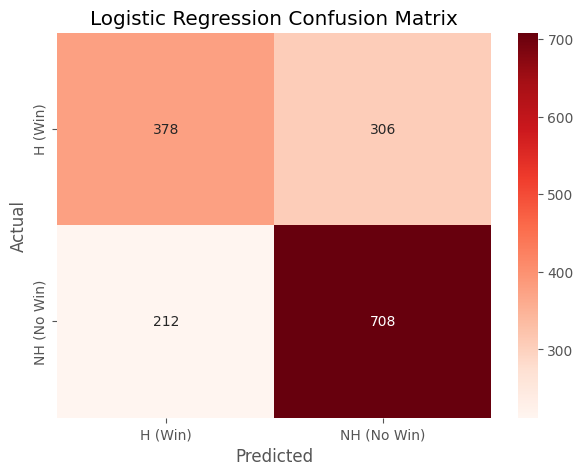

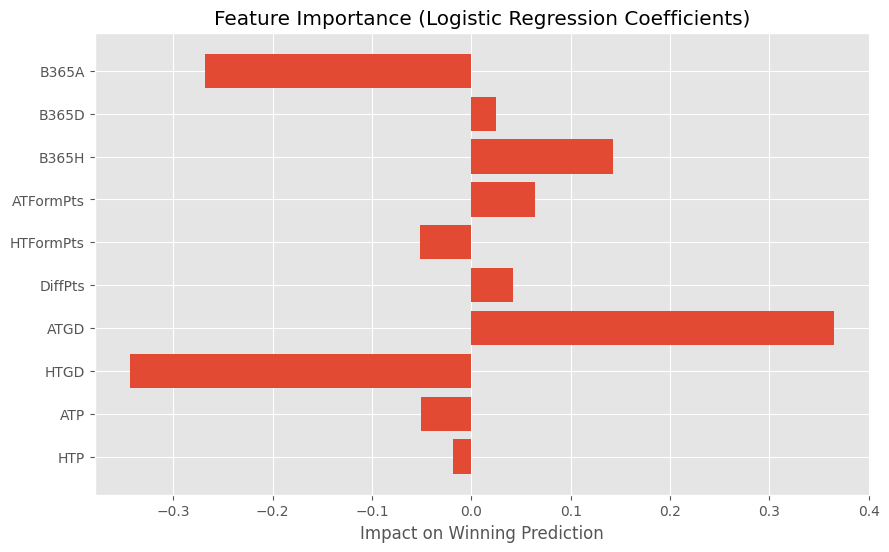

In [4]:
# 1. 4-Box Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['H (Win)', 'NH (No Win)'], 
            yticklabels=['H (Win)', 'NH (No Win)'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Feature Importance Graph
importance = log_model.coef_[0]
plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Impact on Winning Prediction')
plt.show()

In [5]:
# Save the model and scaler
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Files 'logistic_model.pkl' and 'scaler.pkl' saved in the models/ folder.")

Files 'logistic_model.pkl' and 'scaler.pkl' saved in the models/ folder.
